<a href="https://colab.research.google.com/github/MichaelKupfer/MAT421/blob/main/mat421_hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 3 - Machine Learning

3.4 Logistic Regression

Logistic regression is a model that uses a logistic function to model a binary, dependent variable. Logistic regression can be used for different types of events including image recognition. Given a set of inputs and a binary output of either 0 or 1, we model the logit function of the probability of the output as a linear function of the inputs. Rearranging the logit function gives the sigmoid function and we then minimize the cross-entropy loss. 

Practice: Use scikit-learn for image classification

In [26]:
#import dataset
#images of numbers and labels
from sklearn.datasets import load_digits
digits = load_digits()

# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


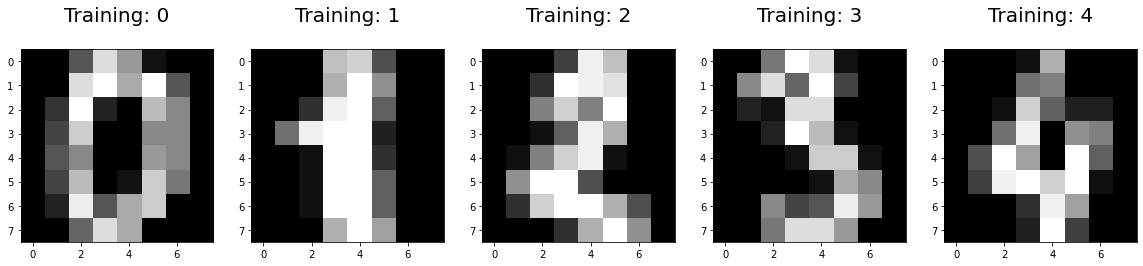

In [27]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
#plot first five images
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 #images
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 #labels (number)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [28]:
#split our data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [29]:
#import our logistic regression
from sklearn.linear_model import LogisticRegression

#create instance of model
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
#fit data using train images and labels
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

#predict for entire test dataset
predictions = logisticRegr.predict(x_test)

In [32]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


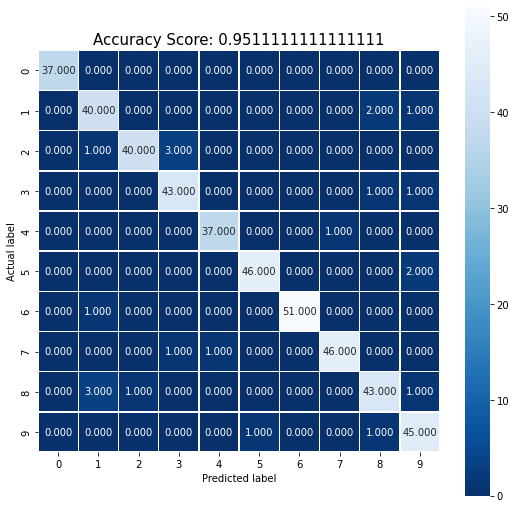

In [33]:
#we can also use a confusion matrix to see what was predicted correctly or incorrectly
import seaborn as sns
from sklearn import metrics
plt.figure(figsize=(9,9))
#create confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
#generate heatmap with seaborn
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [70]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
  if label != predict:
      misclassifiedIndexes.append(index)
  index += 1

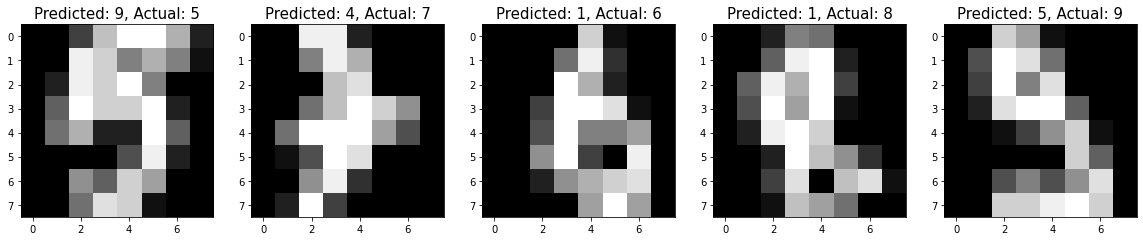

In [72]:
#display first 5 incorrect images
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
  plt.subplot(1, 5, plotIndex + 1)
  plt.imshow(np.reshape(x_test[badIndex], (8,8)), cmap=plt.cm.gray)
  plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

3.5 K-means

K-means is a clustering technique that finds groups of similar objects. It separates n objects into k groups. Each observation belongs to the cluster with the nearest mean. The method aims to minimize the within-cluster sum of squares (variance).

Practice: Use scikit-learn to create a K-means model. 

In [76]:
from sklearn.datasets import make_blobs

# create dataset
# X is the features(2) while y contains which center it is(0-2)
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

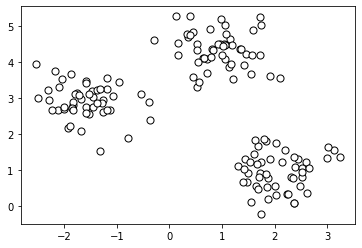

In [77]:
# plot generated blobs
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [87]:
#import the KMeans method
from sklearn.cluster import KMeans

#create model
#set 3 clusters and run the algorithm 10 times(n_init)
#the maximum number of each run will be 300(max_iter)
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

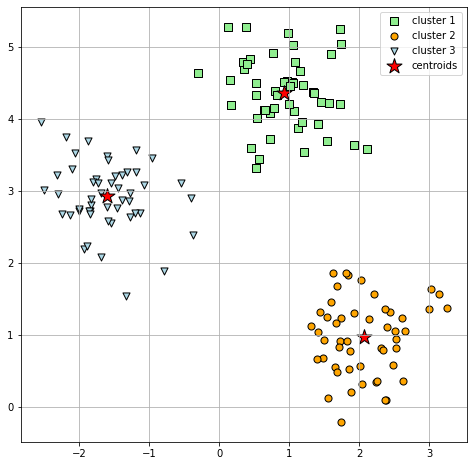

In [89]:
#plot our clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

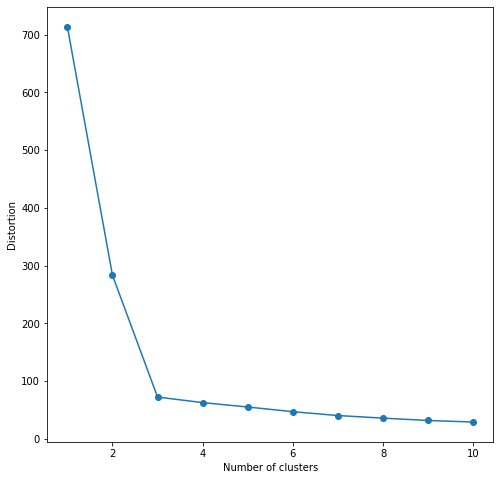

In [90]:
#one issue with k-means is that the number of clusters must be preset which is not always easy to tell in real-world situatins
#we can use the elbow method to determine the number of clusters
#each time we add a cluster the sum of squared errors (SSE) will decrease
#the "elbow" or bend in the graph shows the number of clusters where the SSE or distortions does not rapidly decrease
distortions = []
#run KMeans for 1-11 clusters
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    #distortion for each KMeans
    distortions.append(km.inertia_)

# plot
plt.figure(figsize=(8,8))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
#plot shows that 3 is the optimal number of clusters

3.6 Support Vector Machine

Support Vector Machines (SVMs) are used for classification and regression similar to logistic regression. The objective of SVMs is to find a hyperplane that distinctly classifies the data points. We want to maximize distance of hyperplanes that divides the group of points. 

Practice: Use scikit-learn to create an SVM

In [91]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [93]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

# print data(feature)shape
cancer.data.shape

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


(569, 30)

In [94]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=0) # 70% training and 30% test

In [95]:
#import and create the model
from sklearn import svm

#Create a svm Classifier
#can use .SVR for regression
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [97]:
#print accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9590643274853801
